In [ ]:
0.5 1.0 1.5 (1.8) 2.0 2.5 3.0 3.5 4.0 5.0 6.0 7.0
80k
0.01
0.0 / 0.9 + nesterov
--project_on_sphere True
--early_stopping_epochs -1


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def parse_log(filename):
    all_train_losses = []
    all_train_errors = []
    all_test_errors = []
    a = open(filename)
    train_losses = []
    train_errors = []
    test_errors = []
    for x in a:
        b = x.split()
        if b[0] == "INFO:root:Run":
            all_train_losses.append(np.array(train_losses))
            all_train_errors.append(np.array(train_errors))
            all_test_errors.append(np.array(test_errors))
            train_losses = []
            train_errors = []
            test_errors = []
        if b[0] != "INFO:root:#E:":
            continue
        train_loss = float(b[4])
        train_error = float(b[7])
        test_error = float(b[10])
        train_losses.append(train_loss)
        train_errors.append(train_error)
        test_errors.append(test_error)
    return all_train_losses, all_train_errors, all_test_errors

In [25]:
def numpy_ewma_vectorized(data, window):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out 

In [29]:
train_losses, train_errors, test_errors = parse_log('logs/log_001.log')

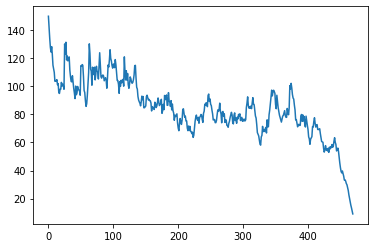

In [43]:
plt.plot(numpy_ewma_vectorized(train_losses[9], 10)[20:])

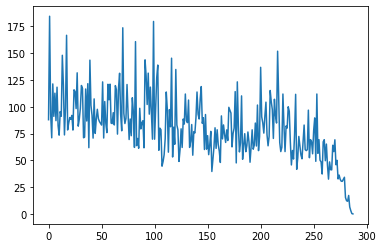

In [24]:
plt.plot(train_losses[10:])